# TPM034A Machine Learning for socio-technical systems
## `Assignment 01: Discover, explore and visualise data`

**Delft University of Technology**<br>
**Q2 2023**<br>
**Instructor:** Sander van Cranenburgh <br>
**TAs:**  Francisco Garrido Valenzuela & Lucas Spierenburg <br>

### `Instructions`

**Assignments aim to:**<br>
* Examine your understanding of the key concepts and techniques.
* Examine your applied ML skills.

**Assignments:**<br>
* Are graded and must be submitted (see the submission instruction below).

### `Workspace set-up`

**Option 1: Local environment**<br>
Uncomment the following cell if you are running this notebook on your local environment. This will install all dependencies on your Python version.

In [ ]:
#!pip install -r requirements.txt

**Option 2: Google Colab**<br>
Uncomment the following cells code lines if you are running this notebook on Colab

In [1]:
!git clone https://github.com/TPM034A/Q2_2023
!pip install -r Q2_2023/requirements_colab.txt
!mv "/content/Q2_2023/Assigments/assignment_01/data" /content/data

Cloning into 'Q2_2023'...
remote: Enumerating objects: 124, done.
remote: Counting objects: 100% (43/43), done.
remote: Compressing objects: 100% (34/34), done.
remote: Total 124 (delta 20), reused 16 (delta 7), pack-reused 81
Receiving objects: 100% (124/124), 42.34 MiB | 21.59 MiB/s, done.
Resolving deltas: 100% (38/38), done.
Updating files: 100% (35/35), done.


## `Application: Liveability and affordable housing in Amsterdam` <br>

### **Introduction**
There is a widespread sense that affordable housing for the middle incomes households is under pressure. Especially for new entrants to the housing markets (i.e. those who do not yet own a house), affordable houses to buy in pleasant neighboorhoods are in short supply. Entrants to the housing market typically are people in their 20s and 30s.<br>

The municipality of Amsterdam would like to tackle this issue. (see https://openresearch.amsterdam/en/page/77950/housing-crisis for articles on the subject). However, at present, the municipality of Amsterdam lacks insights on the future evolution of real-estate prices and liveability in neighborhoods. <br>

*Your are asked to assist the municipality of Amsterdam in predicting **where** and **how** real-estate prices and liveability will change in the coming years.*<br>

### **Data**

You have access to four data sets:
1. Real-estate prices in Amsterdam, at a 100x100m square grid level
1. Liveability scores in the Netherlands, at a 100x100m square grid level
1. Population statistics in Amsterdam, at a 100x100m square grid level
1. Geographical boundaries of the 100x100m squares in Amsterdam

### **Notes**
- In the liveability scores dataset the column *versie* show the different versions of the livability score, we only use the 3rd version. Thus, you may filter this column to keep *Leefbaarometer 3.0*	only.
- You may assume that the population statistics and geospatial data have not substantially changed across the years 2014 and 2020. Thus, you may assume both apply to 2014 and 2020.
- For population statistics (3rd dataset), [this document](https://github.com/TPM034A/Q2_2023/blob/53a3eebac458f324d05f60676f0d41dd10a31771/Assigments/assignment_01/data/demog_data/metadata.csv) provides a brief explanation of the features.

### **Tasks and grading**

Your assigment is divided into 3 subtasks: (1) Data preparation, (2) Data exploration and (3) Assess the affordability of 'liveable' neighbourhoods. In total, 10 points can be earned in this assignment. The weight per subtask is shown below.

1.  **Data preparation: construct data from multiple data sources.** [2 pnt]
    1. Load the four dataset and show a preview of the dataset structure (some DataFrame rows).
    1. Prepare two tabular (i.e. non-GIS data) dataframes, one for 2014 and one for 2020, containing the following information for the city of Amsterdam:
        - The liveability data for the year of interest, using the 3rd version of the Leefbaarometer
        - Demographic data, housing stock data, accessibility to amenities
        - Real-estate prices
         
            **Hints:**
            1. *Make sure to filter the data and remove NULL (NaN values) if required*<br>
            1. *Each row in the data contains the information of one sq*
    1. Add the geospatial (i.e. GIS) data of the squares to your dataframes.
1.  **Assess the relative change in real-estate prices and liveability in Amsterdam.** [3 pnt]
    1. Explore how the relative change in liveability associates with the relative change in real-estate prices (i.e use the **percentage of change**). Show your results using a scatter plot.
    1. Visualize the spatial distribution of the relative change in real-estate price and liveability, using two maps of Amsterdam.
    1. What are the spatial trends for the evolution of the real-estate price and the liveability index? Do you observe some relationship between the two variables?
1.  **Train a regression model to predict the change in real-estate price and liveability in Amsterdam between 2014 and 2020, using data for 2014** [2 pnt]
    1. Train a regression model to predict the change in real-estate price and liveability in Amsterdam between 2014 and 2020, using data on real-estate price, liveability, demographics, housing stock, and accessibility to amenities in 2014.
    1. Interpretation of the regression results:
        1.  Interpret the relationship between the price in 2014 and the delta in price
        1. Interpret the relationship between the price in 2014 and the delta in liveability
        1. Compare the model performance of the two regression models. Which metric ($\Delta$ price or $\Delta$ liveavility) is easiest to predict given the available data in 2014?
1.  **Predict the changes in real-estate price and liveability between 2020 and 2026.** [3 pnt]
    1. Apply your trained regression model on the data of 2020 to predict the relative changes in 2026.
    1. Visualize the spatial distribution of the relative change in real-estate price and liveability between 2020 and 2026.
    1. What is the difference between the predicted evolution between 2020 and 2026 and the observed evolution between 2014 and 2020?
    1. Qualitative reflect on machine learning and generalisation. What assumption are you making when predicting future evolution from past evolution? Give an example of risk associated with this approach and elaborate.

### **Submission**
- The deadline for this assignment is **21 November 2023 23:59**
- Use **Python 3.10 or above**
- You have to submit your work in zip file with the ipynb (fully executed) in brightspace

In [2]:
import os
from os import getcwd
from pathlib import Path

import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
from branca.element import Figure

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

pd.set_option('display.max_columns', None)

### 1. Data preparation: construct data from multiple data sources [2 pnt]
#### 1.1 Load the four dataset and show a preview of the dataset structure (some DataFrame rows).

In [3]:
# Get the current working directory
working_folder = getcwd()
data_folder = Path(f'data')
print(data_folder)

data


In [4]:
# load data using panadas
demog_data = pd.read_csv(data_folder/'demog_data/demog_data_Amsterdam.csv')
liveability_data = pd.read_csv(data_folder/'liveability/sq_livability.csv')
real_estate_data = pd.read_csv(data_folder/'real_estate_price/sq_price.csv')
squares_ams_data = gpd.read_file(data_folder/'/content/data/spatial_data/squares_Amsterdam.gpkg')

# other
amsterdam_bound_data = gpd.read_file(data_folder/'/content/data/spatial_data/Amsterdam_boundary.gpkg')

In [5]:
print(demog_data.shape)
demog_data.head()

(5572, 147)


,grid_id,INWONER_2020,VROUW_2020,INW_014_2020,INW_1524_2020,INW_2544_2020,INW_4564_2020,INW_65PL_2020,GEBOORTE_2020,P_NL_ACHTG_2020,P_WE_MIG_A_2020,P_NW_MIG_A_2020,AANTAL_HH_2020,TOTHH_EENP_2020,TOTHH_MPZK_2020,HH_EENOUD_2020,HH_TWEEOUD_2020,GEM_HH_GR_2020,WONING_2020,WONVOOR45_2020,WON_4564_2020,WON_6574_2020,WON_7584_2020,WON_8594_2020,WON_9504_2020,WON_0514_2020,WON_1524_2020,WON_MRGEZ_2020,P_HUURWON_2020,P_KOOPWON_2020,WON_HCORP_2020,WON_NBEW_2020,G_GAS_WON_2020,G_ELEK_WON_2020,UITKMINAOW_2020,AFS_SUPERM_2020,AV1_SUPERM_2020,AFS_DAGLMD_2020,AV1_DAGLMD_2020,AFS_WARENH_2020,AFS_CAFE_2020,AV1_CAFE_2020,AFS_CAFTAR_2020,AV1_CAFTAR_2020,AFS_HOTEL_2020,AFS_RESTAU_2020,AV1_RESTAU_2020,AFS_BSO_2020,AV1_BSO_2020,AFS_KDV_2020,AV1_KDV_2020,AFS_OPRIT_2020,AFS_TRNOVS_2020,AFS_TREINS_2020,AFS_ATTRAC_2020,AFS_BIOS_2020,AFS_MUS_2020,AFS_PODIUM_2020,AFS_BIBLIO_2020,AF_IJSBAAN_2020,AFS_SAUNA_2020,AFS_ZONBNK_2020,AFS_ZWEMB_2020,AFS_ONDBAS_2020,AV1_ONDBAS_2020,AFS_ONDHV_2020,AFS_ONDVMB_2020,AFS_ONDVRT_2020,AFS_HAPRAK_2020,AV1_HAPRAK_2020,AFS_ZIEK_E_2020,AFS_ZIEK_I_2020,AFS_APOTH_2020,AFS_HAPOST_2020,INWONER_2014,VROUW_2014,INW_014_2014,INW_1524_2014,INW_2544_2014,INW_4564_2014,INW_65PL_2014,GEBOORTE_2014,P_NL_ACHTG_2014,P_WE_MIG_A_2014,P_NW_MIG_A_2014,AANTAL_HH_2014,TOTHH_EENP_2014,TOTHH_MPZK_2014,HH_EENOUD_2014,HH_TWEEOUD_2014,GEM_HH_GR_2014,WONING_2014,WONVOOR45_2014,WON_4564_2014,WON_6574_2014,WON_7584_2014,WON_8594_2014,WON_9504_2014,WON_0514_2014,WON_1524_2014,P_HUURWON_2014,P_KOOPWON_2014,WON_HCORP_2014,WON_MRGEZ_2014,WON_NBEW_2014,G_GAS_WON_2014,G_ELEK_WON_2014,UITKMINAOW_2014,AFS_SUPERM_2014,AV1_SUPERM_2014,AFS_DAGLMD_2014,AV1_DAGLMD_2014,AFS_WARENH_2014,AFS_CAFE_2014,AV1_CAFE_2014,AFS_CAFTAR_2014,AV1_CAFTAR_2014,AFS_HOTEL_2014,AFS_RESTAU_2014,AV1_RESTAU_2014,AFS_BSO_2014,AV1_BSO_2014,AFS_KDV_2014,AV1_KDV_2014,AFS_OPRIT_2014,AFS_TRNOVS_2014,AFS_TREINS_2014,AFS_ATTRAC_2014,AFS_BIOS_2014,AFS_MUS_2014,AFS_PODIUM_2014,AFS_BIBLIO_2014,AF_IJSBAAN_2014,AFS_SAUNA_2014,AFS_ZONBNK_2014,AFS_ZWEMB_2014,AFS_ONDBAS_2014,AV1_ONDBAS_2014,AFS_ONDHV_2014,AFS_ONDVMB_2014,AFS_ONDVRT_2014,AFS_HAPRAK_2014,AV1_HAPRAK_2014,AFS_ZIEK_E_2014,AFS_ZIEK_I_2014,AFS_APOTH_2014,AFS_HAPOST_2014
0,E1208N4930,60,35,10,5,20,10,5,-99997,40,-99997,-99997,20,5,-99997,-99997,10,2.8,20,-99997,-99997,-99997,-99997,20,-99997,-99997,-99997,-99997,40,60,10,-99997,900,3210,5,1.1,0.0,1.2,0.0,3.1,2.0,0.0,1.0,0.4,1.7,1.4,0.0,0.7,1.0,0.7,3.0,0.9,6.2,6.2,7.9,6.2,5.0,4.5,1.2,12.1,5.0,5.7,4.7,0.8,2.0,4.3,1.0,1.0,1.2,0.0,4.1,4.1,1.2,4.1,55.0,25.0,10.0,10.0,20.0,15.0,5.0,-99997.0,50.0,-99997.0,50.0,20.0,-99997.0,5.0,-99997.0,10.0,2.9,20.0,-99997.0,-99997.0,-99997.0,-99997.0,20.0,-99997.0,-99997.0,-99997.0,60.0,40.0,10.0,-99997.0,-99997.0,970.0,3070.0,5.0,1.1,0.0,1.1,0.0,3.1,1.9,0.0,1.0,0.5,1.7,1.2,0.0,0.7,1.0,0.7,1.0,0.9,6.8,6.8,8.7,6.2,6.1,3.8,1.1,12.3,5.0,5.7,4.6,0.8,1.0,5.5,3.4,3.4,1.0,0.2,4.3,4.3,1.0,4.3
1,E1209N4930,100,50,15,15,25,25,15,-99997,50,10,50,45,20,5,5,10,2.2,45,-99997,-99997,-99997,-99997,45,-99997,-99997,-99997,-99997,30,70,30,-99997,860,2640,10,1.0,0.0,1.1,0.0,3.0,1.9,0.0,1.0,1.0,1.7,1.3,0.0,0.6,1.0,0.6,3.0,1.0,6.3,6.3,8.0,6.2,5.0,4.4,1.1,12.0,5.0,5.7,4.7,0.7,2.0,4.2,1.1,1.1,1.1,0.0,4.1,4.1,1.1,4.1,105.0,50.0,20.0,15.0,30.0,30.0,10.0,-99997.0,50.0,10.0,40.0,50.0,25.0,5.0,10.0,10.0,2.0,45.0,-99997.0,-99997.0,-99997.0,-99997.0,45.0,-99997.0,-99997.0,-99997.0,70.0,30.0,35.0,-99997.0,-99997.0,1000.0,2640.0,15.0,1.0,0.4,1.0,1.2,3.0,1.8,0.0,0.9,1.4,1.7,1.1,0.0,0.6,1.0,0.6,1.0,1.0,6.9,6.9,8.7,6.2,6.0,3.7,1.0,12.2,4.9,5.6,4.5,0.7,1.0,5.4,3.3,3.3,0.9,1.0,4.2,4.2,0.9,4.2
2,E1210N4930,60,30,10,5,15,20,5,-99997,60,20,20,25,-99997,5,-99997,10,2.6,20,-99997,-99997,-99997,-99997,-99997,-99997,20,-99997,5,90,-99997,-99997,-99997,930,3300,-99997,0.2,1.8,0.6,6.2,2.2,1.7,0.0,0.7,2.8,2.1,1.1,0.0,0.6,1.0,0.6,3.0,1.4,6.6,6.6,8.0,5.8,4.7,4.2,0.9,11.8,4.7,5.4,4.4,0.6,2.0,4.0,1.5,1.5,0.9,0.9,3.9,3.9,0.9,3.9,60.0,35.0,15.0,10.0,20.0,20.0,-99997.0,-99997.0,60.0,20.0,20.0,25.0,-99997.0,-99997.0,-999

In [6]:
print(liveability_data.shape)
liveability_data.head()

(38691, 10)


,grid_id,versie,jaar,lbm,afw,fys,onv,soc,vrz,won
0,E1123N4882,Leefbaarometer 1.0,2002,4.205914,0.103649,NaN,NaN,NaN,NaN,NaN
1,E1123N4882,Leefbaarometer 1.0,2008,4.111197,0.008932,NaN,NaN,NaN,NaN,NaN
2,E1123N4882,Leefbaarometer 2.0,2012,4.089451,-0.012813,NaN,NaN,NaN,NaN,NaN
3,E1123N4882,Leefbaarometer 3.0,2014,4.224886,0.122621,-0.007954,0.002207,0.078486,0.009748,0.040134
4,E1123N4882,Leefbaarometer 2.0,2016,4.142126,0.039861,NaN,NaN,NaN,NaN,NaN


Liveability indicators:

lbm is the key variable of interest in this lab session. It is composed of the variables below:
- afw  Deviation from previous model
- fys  Physical environment
- onv  Nuisance and insecurity
- soc  Social cohesion
- vrz  Amenities
- won  Housing stock

In [7]:
print(real_estate_data.shape)
real_estate_data.head()

(5295, 3)


,grid_id,price_2014,price_2020
0,E1208N4930,188.0,314.0
1,E1209N4930,181.0,306.0
2,E1210N4930,259.0,428.0
3,E1211N4930,296.0,499.0
4,E1212N4930,246.0,388.0


In [8]:
print(squares_ams_data.shape)
squares_ams_data.head()

(6762, 2)


,grid_id,geometry
0,E1208N4930,"MULTIPOLYGON (((120800.000 493100.000, 120900...."
1,E1209N4930,"MULTIPOLYGON (((120900.000 493100.000, 121000...."
2,E1210N4930,"MULTIPOLYGON (((121000.000 493100.000, 121100...."
3,E1211N4930,"MULTIPOLYGON (((121100.000 493100.000, 121200...."
4,E1212N4930,"MULTIPOLYGON (((121200.000 493100.000, 121300...."


In [9]:
print(amsterdam_bound_data.shape)
amsterdam_bound_data.head()

(1, 2)


,GM_NAAM,geometry
0,Amsterdam,"MULTIPOLYGON (((112786.559 493486.267, 112664...."


#### 1.2 Prepare two tabular dataframes (for 2014 and 2020) that contains the following information for Amsterdam:
- the liveability data for the year of interest, using the 3rd version of the Leefbaarometer
- population data
- Real-estate prices

**Hints:**
1. *Make sure to filter the data and remove NULL (NaN values) if required*<br>
1. *Each row in the data contains the information of one sq*

In [10]:
# define the empty value
EMPTY_VALUE = -99997.0

### Liveability dataset

#### Remove nulls

In [11]:
# check for null lbms
liveability_data.isnull().sum()

grid_id        0
versie         0
jaar           0
lbm            0
afw            0
fys        21844
onv        21844
soc        21844
vrz        21844
won        21844
dtype: int64

In [12]:
# check for empty values if any
liveability_data[liveability_data == EMPTY_VALUE].count()

grid_id    0
versie     0
jaar       0
lbm        0
afw        0
fys        0
onv        0
soc        0
vrz        0
won        0
dtype: int64

#### 2014

In [13]:
# only keep version 3 of Leefbaarometer and year 2014
liveability_data_2014 = liveability_data[(liveability_data['versie'] == 'Leefbaarometer 3.0') & (liveability_data['jaar'] == 2014)]
print(liveability_data_2014.shape)
liveability_data_2014.head()

(5599, 10)


,grid_id,versie,jaar,lbm,afw,fys,onv,soc,vrz,won
3,E1123N4882,Leefbaarometer 3.0,2014,4.224886,0.122621,-0.007954,0.002207,0.078486,0.009748,0.040134
10,E1124N4881,Leefbaarometer 3.0,2014,4.236831,0.134566,-0.014259,0.012684,0.097041,0.002809,0.036292
17,E1125N4880,Leefbaarometer 3.0,2014,4.248156,0.145891,-0.019517,0.023156,0.116893,-0.004729,0.030087
24,E1125N4881,Leefbaarometer 3.0,2014,4.248156,0.145891,-0.019517,0.023156,0.116893,-0.004729,0.030087
31,E1126N4879,Leefbaarometer 3.0,2014,4.266799,0.164535,-0.039108,0.032206,0.115276,-0.002584,0.058745


#### 2020

In [14]:
# only keep version 3 of Leefbaarometer and year 2020
liveability_data_2020 = liveability_data[(liveability_data['versie'] == 'Leefbaarometer 3.0') & (liveability_data['jaar'] == 2020)]
print(liveability_data_2020.shape)
liveability_data_2020.head()

(5624, 10)


,grid_id,versie,jaar,lbm,afw,fys,onv,soc,vrz,won
6,E1123N4882,Leefbaarometer 3.0,2020,4.167609,0.065344,-0.021125,-0.019702,0.061536,0.003455,0.041179
13,E1124N4881,Leefbaarometer 3.0,2020,4.167404,0.065140,-0.026389,0.002776,0.053792,-0.001693,0.036654
20,E1125N4880,Leefbaarometer 3.0,2020,4.166410,0.064146,-0.030496,0.024581,0.046167,-0.006775,0.030670
27,E1125N4881,Leefbaarometer 3.0,2020,4.166410,0.064146,-0.030496,0.024581,0.046167,-0.006775,0.030670
34,E1126N4879,Leefbaarometer 3.0,2020,4.177675,0.075410,-0.045276,0.027190,0.046866,-0.006121,0.052750


### Demographic (Population) data

#### Remove nulls

In [15]:
# check for nulls
demog_data.isnull().sum()

grid_id            0
INWONER_2020       0
VROUW_2020         0
INW_014_2020       0
INW_1524_2020      0
                  ..
AV1_HAPRAK_2014    0
AFS_ZIEK_E_2014    0
AFS_ZIEK_I_2014    0
AFS_APOTH_2014     0
AFS_HAPOST_2014    0
Length: 147, dtype: int64

In [16]:
# check for empty values if any
demog_data[demog_data == EMPTY_VALUE].count()

grid_id              0
INWONER_2020         9
VROUW_2020          33
INW_014_2020       692
INW_1524_2020      921
                  ... 
AV1_HAPRAK_2014     31
AFS_ZIEK_E_2014     26
AFS_ZIEK_I_2014     26
AFS_APOTH_2014      31
AFS_HAPOST_2014     26
Length: 147, dtype: int64

In [17]:
# drop rows where population is empty
print("Shape before:", demog_data.shape)
demog_data = demog_data[demog_data['INWONER_2014'] != EMPTY_VALUE]
demog_data = demog_data[demog_data['INWONER_2020'] != EMPTY_VALUE]
print("Shape after:", demog_data.shape)

Shape before: (5572, 147)
Shape after: (5537, 147)


#### 2014

In [18]:
# get 2014 data
cols_2014 = ['grid_id'] + [col for col in demog_data if '2014' in col]
demog_data_2014 = demog_data[cols_2014]
demog_data_2014.head()

,grid_id,INWONER_2014,VROUW_2014,INW_014_2014,INW_1524_2014,INW_2544_2014,INW_4564_2014,INW_65PL_2014,GEBOORTE_2014,P_NL_ACHTG_2014,P_WE_MIG_A_2014,P_NW_MIG_A_2014,AANTAL_HH_2014,TOTHH_EENP_2014,TOTHH_MPZK_2014,HH_EENOUD_2014,HH_TWEEOUD_2014,GEM_HH_GR_2014,WONING_2014,WONVOOR45_2014,WON_4564_2014,WON_6574_2014,WON_7584_2014,WON_8594_2014,WON_9504_2014,WON_0514_2014,WON_1524_2014,P_HUURWON_2014,P_KOOPWON_2014,WON_HCORP_2014,WON_MRGEZ_2014,WON_NBEW_2014,G_GAS_WON_2014,G_ELEK_WON_2014,UITKMINAOW_2014,AFS_SUPERM_2014,AV1_SUPERM_2014,AFS_DAGLMD_2014,AV1_DAGLMD_2014,AFS_WARENH_2014,AFS_CAFE_2014,AV1_CAFE_2014,AFS_CAFTAR_2014,AV1_CAFTAR_2014,AFS_HOTEL_2014,AFS_RESTAU_2014,AV1_RESTAU_2014,AFS_BSO_2014,AV1_BSO_2014,AFS_KDV_2014,AV1_KDV_2014,AFS_OPRIT_2014,AFS_TRNOVS_2014,AFS_TREINS_2014,AFS_ATTRAC_2014,AFS_BIOS_2014,AFS_MUS_2014,AFS_PODIUM_2014,AFS_BIBLIO_2014,AF_IJSBAAN_2014,AFS_SAUNA_2014,AFS_ZONBNK_2014,AFS_ZWEMB_2014,AFS_ONDBAS_2014,AV1_ONDBAS_2014,AFS_ONDHV_2014,AFS_ONDVMB_2014,AFS_ONDVRT_2014,AFS_HAPRAK_2014,AV1_HAPRAK_2014,AFS_ZIEK_E_2014,AFS_ZIEK_I_2014,AFS_APOTH_2014,AFS_HAPOST_2014
0,E1208N4930,55.0,25.0,10.0,10.0,20.0,15.0,5.0,-99997.0,50.0,-99997.0,50.0,20.0,-99997.0,5.0,-99997.0,10.0,2.9,20.0,-99997.0,-99997.0,-99997.0,-99997.0,20.0,-99997.0,-99997.0,-99997.0,60.0,40.0,10.0,-99997.0,-99997.0,970.0,3070.0,5.0,1.1,0.0,1.1,0.0,3.1,1.9,0.0,1.0,0.5,1.7,1.2,0.0,0.7,1.0,0.7,1.0,0.9,6.8,6.8,8.7,6.2,6.1,3.8,1.1,12.3,5.0,5.7,4.6,0.8,1.0,5.5,3.4,3.4,1.0,0.2,4.3,4.3,1.0,4.3
1,E1209N4930,105.0,50.0,20.0,15.0,30.0,30.0,10.0,-99997.0,50.0,10.0,40.0,50.0,25.0,5.0,10.0,10.0,2.0,45.0,-99997.0,-99997.0,-99997.0,-99997.0,45.0,-99997.0,-99997.0,-99997.0,70.0,30.0,35.0,-99997.0,-99997.0,1000.0,2640.0,15.0,1.0,0.4,1.0,1.2,3.0,1.8,0.0,0.9,1.4,1.7,1.1,0.0,0.6,1.0,0.6,1.0,1.0,6.9,6.9,8.7,6.2,6.0,3.7,1.0,12.2,4.9,5.6,4.5,0.7,1.0,5.4,3.3,3.3,0.9,1.0,4.2,4.2,0.9,4.2
2,E1210N4930,60.0,35.0,15.0,10.0,20.0,20.0,-99997.0,-99997.0,60.0,20.0,20.0,25.0,-99997.0,-99997.0,-99997.0,10.0,2.7,20.0,-99997.0,-99997.0,-99997.0,-99997.0,-99997.0,-99997.0,20.0,-99997.0,-99997.0,90.0,-99997.0,5.0,-99997.0,1050.0,3650.0,-99997.0,0.4,2.1,0.7,6.7,2.4,1.6,0.0,0.7,2.0,2.0,0.8,0.6,0.6,1.0,0.6,1.0,1.2,6.7,6.7,8.4,5.9,5.8,3.6,0.9,12.1,4.7,5.5,4.3,0.6,1.0,5.2,3.1,3.1,0.9,1.0,4.1,4.1,0.9,4.1
3,E1211N4930,25.0,15.0,-99997.0,-99997.0,5.0,15.0,-99997.0,-99997.0,80.0,-99997.0,20.0,10.0,-99997.0,-99997.0,-99997.0,5.0,2.6,10.0,10.0,-99997.0,-99997.0,-99997.0,-99997.0,-99997.0,-99997.0,-99997.0,-99997.0,70.0,-99997.0,-99997.0,-99997.0,2020.0,3710.0,-99997.0,0.1,3.0,0.6,8.0,2.1,1.5,0.0,0.6,2.0,2.1,0.7,1.0,0.6,1.0,0.6,1.0,1.4,6.7,6.7,8.3,5.8,5.7,3.5,0.8,12.0,4.6,5.4,4.2,0.6,1.0,5.1,3.0,3.0,0.8,1.0,4.0,4.0,0.8,4.0
4,E1212N4930,55.0,25.0,10.0,5.0,15.0,25.0,-99997.0,-99997.0,70.0,-99997.0,20.0,20.0,-99997.0,10.0,-99997.0,10.0,2.7,20.0,-99997.0,-99997.0,-99997.0,-99997.0,20.0,-99997.0,-99997.0,-99997.0,-99997.0,100.0,-99997.0,-99997.0,-99997.0,1000.0,3520.0,-99997.0,0.4,2.0,0.5,2.0,2.3,1.8,0.0,0.9,1.0,2.5,0.5,1.0,0.9,1.0,0.9,1.0,1.7,7.0,7.0,8.5,6.0,6.0,3.8,1.1,12.3,4.9,5.7,4.5,0.9,1.0,5.4,3.4,3.4,1.1,0.0,4.3,4.3,1.1,4.3


#### 2020

In [19]:
# get 2020 data
cols_2020 = ['grid_id'] + [col for col in demog_data if '2020' in col]
demog_data_2020 = demog_data[cols_2020]
demog_data_2020.head()

,grid_id,INWONER_2020,VROUW_2020,INW_014_2020,INW_1524_2020,INW_2544_2020,INW_4564_2020,INW_65PL_2020,GEBOORTE_2020,P_NL_ACHTG_2020,P_WE_MIG_A_2020,P_NW_MIG_A_2020,AANTAL_HH_2020,TOTHH_EENP_2020,TOTHH_MPZK_2020,HH_EENOUD_2020,HH_TWEEOUD_2020,GEM_HH_GR_2020,WONING_2020,WONVOOR45_2020,WON_4564_2020,WON_6574_2020,WON_7584_2020,WON_8594_2020,WON_9504_2020,WON_0514_2020,WON_1524_2020,WON_MRGEZ_2020,P_HUURWON_2020,P_KOOPWON_2020,WON_HCORP_2020,WON_NBEW_2020,G_GAS_WON_2020,G_ELEK_WON_2020,UITKMINAOW_2020,AFS_SUPERM_2020,AV1_SUPERM_2020,AFS_DAGLMD_2020,AV1_DAGLMD_2020,AFS_WARENH_2020,AFS_CAFE_2020,AV1_CAFE_2020,AFS_CAFTAR_2020,AV1_CAFTAR_2020,AFS_HOTEL_2020,AFS_RESTAU_2020,AV1_RESTAU_2020,AFS_BSO_2020,AV1_BSO_2020,AFS_KDV_2020,AV1_KDV_2020,AFS_OPRIT_2020,AFS_TRNOVS_2020,AFS_TREINS_2020,AFS_ATTRAC_2020,AFS_BIOS_2020,AFS_MUS_2020,AFS_PODIUM_2020,AFS_BIBLIO_2020,AF_IJSBAAN_2020,AFS_SAUNA_2020,AFS_ZONBNK_2020,AFS_ZWEMB_2020,AFS_ONDBAS_2020,AV1_ONDBAS_2020,AFS_ONDHV_2020,AFS_ONDVMB_2020,AFS_ONDVRT_2020,AFS_HAPRAK_2020,AV1_HAPRAK_2020,AFS_ZIEK_E_2020,AFS_ZIEK_I_2020,AFS_APOTH_2020,AFS_HAPOST_2020
0,E1208N4930,60,35,10,5,20,10,5,-99997,40,-99997,-99997,20,5,-99997,-99997,10,2.8,20,-99997,-99997,-99997,-99997,20,-99997,-99997,-99997,-99997,40,60,10,-99997,900,3210,5,1.1,0.0,1.2,0.0,3.1,2.0,0.0,1.0,0.4,1.7,1.4,0.0,0.7,1.0,0.7,3.0,0.9,6.2,6.2,7.9,6.2,5.0,4.5,1.2,12.1,5.0,5.7,4.7,0.8,2.0,4.3,1.0,1.0,1.2,0.0,4.1,4.1,1.2,4.1
1,E1209N4930,100,50,15,15,25,25,15,-99997,50,10,50,45,20,5,5,10,2.2,45,-99997,-99997,-99997,-99997,45,-99997,-99997,-99997,-99997,30,70,30,-99997,860,2640,10,1.0,0.0,1.1,0.0,3.0,1.9,0.0,1.0,1.0,1.7,1.3,0.0,0.6,1.0,0.6,3.0,1.0,6.3,6.3,8.0,6.2,5.0,4.4,1.1,12.0,5.0,5.7,4.7,0.7,2.0,4.2,1.1,1.1,1.1,0.0,4.1,4.1,1.1,4.1
2,E1210N4930,60,30,10,5,15,20,5,-99997,60,20,20,25,-99997,5,-99997,10,2.6,20,-99997,-99997,-99997,-99997,-99997,-99997,20,-99997,5,90,-99997,-99997,-99997,930,3300,-99997,0.2,1.8,0.6,6.2,2.2,1.7,0.0,0.7,2.8,2.1,1.1,0.0,0.6,1.0,0.6,3.0,1.4,6.6,6.6,8.0,5.8,4.7,4.2,0.9,11.8,4.7,5.4,4.4,0.6,2.0,4.0,1.5,1.5,0.9,0.9,3.9,3.9,0.9,3.9
3,E1211N4930,25,10,-99997,-99997,-99997,10,-99997,-99997,60,-99997,-99997,10,5,-99997,-99997,-99997,2.1,10,10,-99997,-99997,-99997,-99997,-99997,-99997,-99997,-99997,80,-99997,-99997,-99997,1680,3400,-99997,0.1,2.0,0.6,7.0,2.1,1.6,0.0,0.7,3.0,2.1,1.1,0.0,0.6,1.0,0.6,3.0,1.4,6.7,6.7,8.0,5.8,4.7,4.1,0.8,11.7,4.7,5.4,4.4,0.6,2.0,3.9,1.5,1.5,0.8,1.0,3.8,3.8,0.8,3.8
4,E1212N4930,65,30,15,10,15,20,-99997,-99997,60,-99997,-99997,20,-99997,5,-99997,10,2.9,20,-99997,-99997,-99997,-99997,20,-99997,-99997,-99997,-99997,100,-99997,-99997,-99997,920,3330,-99997,0.4,2.0,0.5,2.0,2.3,1.9,0.0,0.5,2.0,2.4,1.3,0.0,0.9,1.0,0.9,3.0,1.7,7.0,7.0,8.2,6.0,5.0,4.4,1.1,12.0,5.0,5.6,4.7,0.9,2.0,4.2,1.8,1.8,1.1,0.0,4.1,4.1,1.1,4.1


### Real estate price

In [20]:
# check for nans and empty vals
print(real_estate_data.isnull().sum())
print("----------")
real_estate_data[real_estate_data == EMPTY_VALUE].count()

grid_id       0
price_2014    0
price_2020    0
dtype: int64
----------


grid_id       0
price_2014    0
price_2020    0
dtype: int64

In [21]:
# split 2014, 2020
real_estate_2014 = real_estate_data.drop('price_2020', axis=1)
real_estate_2020 = real_estate_data.drop('price_2014', axis=1)
real_estate_2014.head()

,grid_id,price_2014
0,E1208N4930,188.0
1,E1209N4930,181.0
2,E1210N4930,259.0
3,E1211N4930,296.0
4,E1212N4930,246.0


### Merge datasets

In [22]:
# 2014
df_2014 = liveability_data_2014.merge(demog_data_2014, on="grid_id")
df_2014 = df_2014.merge(real_estate_2014, on="grid_id")
# remove unnecesary cols
df_2014 = df_2014.drop(['versie', 'jaar'], axis=1)
print(df_2014.shape)
df_2014.head()

(5267, 82)


,grid_id,lbm,afw,fys,onv,soc,vrz,won,INWONER_2014,VROUW_2014,INW_014_2014,INW_1524_2014,INW_2544_2014,INW_4564_2014,INW_65PL_2014,GEBOORTE_2014,P_NL_ACHTG_2014,P_WE_MIG_A_2014,P_NW_MIG_A_2014,AANTAL_HH_2014,TOTHH_EENP_2014,TOTHH_MPZK_2014,HH_EENOUD_2014,HH_TWEEOUD_2014,GEM_HH_GR_2014,WONING_2014,WONVOOR45_2014,WON_4564_2014,WON_6574_2014,WON_7584_2014,WON_8594_2014,WON_9504_2014,WON_0514_2014,WON_1524_2014,P_HUURWON_2014,P_KOOPWON_2014,WON_HCORP_2014,WON_MRGEZ_2014,WON_NBEW_2014,G_GAS_WON_2014,G_ELEK_WON_2014,UITKMINAOW_2014,AFS_SUPERM_2014,AV1_SUPERM_2014,AFS_DAGLMD_2014,AV1_DAGLMD_2014,AFS_WARENH_2014,AFS_CAFE_2014,AV1_CAFE_2014,AFS_CAFTAR_2014,AV1_CAFTAR_2014,AFS_HOTEL_2014,AFS_RESTAU_2014,AV1_RESTAU_2014,AFS_BSO_2014,AV1_BSO_2014,AFS_KDV_2014,AV1_KDV_2014,AFS_OPRIT_2014,AFS_TRNOVS_2014,AFS_TREINS_2014,AFS_ATTRAC_2014,AFS_BIOS_2014,AFS_MUS_2014,AFS_PODIUM_2014,AFS_BIBLIO_2014,AF_IJSBAAN_2014,AFS_SAUNA_2014,AFS_ZONBNK_2014,AFS_ZWEMB_2014,AFS_ONDBAS_2014,AV1_ONDBAS_2014,AFS_ONDHV_2014,AFS_ONDVMB_2014,AFS_ONDVRT_2014,AFS_HAPRAK_2014,AV1_HAPRAK_2014,AFS_ZIEK_E_2014,AFS_ZIEK_I_2014,AFS_APOTH_2014,AFS_HAPOST_2014,price_2014
0,E1123N4882,4.224886,0.122621,-0.007954,0.002207,0.078486,0.009748,0.040134,30.0,20.0,-99997.0,-99997.0,-99997.0,15.0,10.0,-99997.0,60.0,-99997.0,30.0,15.0,-99997.0,5.0,-99997.0,-99997.0,2.2,15.0,-99997.0,-99997.0,-99997.0,-99997.0,10.0,-99997.0,-99997.0,-99997.0,50.0,50.0,5.0,-99997.0,-99997.0,1910.0,3270.0,5.0,0.9,1.0,0.9,1.8,4.7,0.9,1.0,0.7,3.0,0.6,0.9,3.5,0.8,1.0,0.9,1.0,0.5,6.1,1.4,11.7,8.3,5.3,4.7,1.4,11.2,3.9,3.6,4.5,0.6,3.0,5.0,4.3,4.3,0.5,1.0,6.3,6.3,1.5,6.3,310.0
1,E1124N4881,4.236831,0.134566,-0.014259,0.012684,0.097041,0.002809,0.036292,25.0,10.0,-99997.0,-99997.0,-99997.0,15.0,-99997.0,-99997.0,100.0,-99997.0,-99997.0,10.0,-99997.0,-99997.0,-99997.0,-99997.0,2.6,10.0,-99997.0,-99997.0,-99997.0,-99997.0,-99997.0,-99997.0,-99997.0,-99997.0,-99997.0,-99997.0,-99997.0,-99997.0,-99997.0,2320.0,4850.0,-99997.0,1.1,0.0,1.0,0.2,4.6,1.0,0.2,0.8,1.7,0.7,1.1,0.0,0.9,1.0,1.0,0.8,0.6,6.2,1.5,11.8,8.4,5.2,4.6,1.6,11.3,3.8,3.5,4.5,0.7,3.0,4.9,4.2,4.2,0.6,1.0,6.3,6.3,1.6,6.3,387.0
2,E1125N4880,4.248156,0.145891,-0.019517,0.023156,0.116893,-0.004729,0.030087,20.0,10.0,-99997.0,-99997.0,-99997.0,10.0,-99997.0,-99997.0,70.0,-99997.0,30.0,5.0,-99997.0,-99997.0,-99997.0,-99997.0,3.2,5.0,-99997.0,-99997.0,-99997.0,-99997.0,-99997.0,-99997.0,-99997.0,-99997.0,-99997.0,-99997.0,-99997.0,-99997.0,-99997.0,2670.0,5460.0,-99997.0,1.2,0.0,1.2,0.0,4.5,1.2,0.0,0.9,1.0,0.9,1.2,0.0,1.0,0.2,1.1,0.0,0.7,6.4,1.6,11.6,8.6,5.1,4.4,1.7,11.5,3.6,3.4,4.4,0.9,1.2,4.7,4.0,4.0,0.8,1.0,6.2,6.2,1.8,6.2,543.0
3,E1125N4881,4.248156,0.145891,-0.019517,0.023156,0.116893,-0.004729,0.030087,20.0,10.0,-99997.0,-99997.0,-99997.0,5.0,-99997.0,-99997.0,70.0,30.0,-99997.0,5.0,-99997.0,-99997.0,-99997.0,-99997.0,2.6,10.0,-99997.0,-99997.0,-99997.0,-99997.0,10.0,-99997.0,-99997.0,-99997.0,-99997.0,-99997.0,-99997.0,-99997.0,-99997.0,1640.0,3830.0,-99997.0,1.1,0.0,1.1,0.0,4.5,1.1,0.0,0.9,1.0,0.8,1.1,0.0,1.0,1.0,1.1,0.0,0.7,6.3,1.6,11.7,8.5,5.1,4.5,1.6,11.4,3.7,3.4,4.4,0.8,2.8,4.8,4.1,4.1,0.7,1.0,6.3,6.3,1.7,6.3,329.0
4,E1126N4879,4.266799,0.164535,-0.039108,0.032206,0.115276,-0.002584,0.058745,15.0,10.0,-99997.0,-99997.0,-99997.0,5.0,5.0,-99997.0,90.0,-99997.0,-99997.0,5.0,-99997.0,5.0,-99997.0,-99997.0,2.0,5.0,-99997.0,-99997.0,-99997.0,-99997.0,-99997.0,-99997.0,-99997.0,-99997.0,-99997.0,-99997.0,-99997.0,-99997.0,-99997.0,2280.0,3720.0,-99997.0,1.4,0.0,1.3,0.0,4.3,1.3,0.0,1.1,0.0,1.0,1.4,0.0,1.2,0.0,1.3,0.0,0.9,6.5,1.8,11.5,8.5,4.9,4.3,1.9,11.6,3.5,3.2,4.2,1.0,0.1,4.6,3.9,3.9,0.9,1.0,6.0,6.0,1.9,6.0,445.0


In [23]:
# 2020
df_2020 = liveability_data_2020.merge(demog_data_2020, on="grid_id")
df_2020 = df_2020.merge(real_estate_2020, on="grid_id")
# remove unnecesary cols
df_2020 = df_2020.drop(['versie', 'jaar'], axis=1)
print(df_2020.shape)
df_2020.head()

(5267, 82)


,grid_id,lbm,afw,fys,onv,soc,vrz,won,INWONER_2020,VROUW_2020,INW_014_2020,INW_1524_2020,INW_2544_2020,INW_4564_2020,INW_65PL_2020,GEBOORTE_2020,P_NL_ACHTG_2020,P_WE_MIG_A_2020,P_NW_MIG_A_2020,AANTAL_HH_2020,TOTHH_EENP_2020,TOTHH_MPZK_2020,HH_EENOUD_2020,HH_TWEEOUD_2020,GEM_HH_GR_2020,WONING_2020,WONVOOR45_2020,WON_4564_2020,WON_6574_2020,WON_7584_2020,WON_8594_2020,WON_9504_2020,WON_0514_2020,WON_1524_2020,WON_MRGEZ_2020,P_HUURWON_2020,P_KOOPWON_2020,WON_HCORP_2020,WON_NBEW_2020,G_GAS_WON_2020,G_ELEK_WON_2020,UITKMINAOW_2020,AFS_SUPERM_2020,AV1_SUPERM_2020,AFS_DAGLMD_2020,AV1_DAGLMD_2020,AFS_WARENH_2020,AFS_CAFE_2020,AV1_CAFE_2020,AFS_CAFTAR_2020,AV1_CAFTAR_2020,AFS_HOTEL_2020,AFS_RESTAU_2020,AV1_RESTAU_2020,AFS_BSO_2020,AV1_BSO_2020,AFS_KDV_2020,AV1_KDV_2020,AFS_OPRIT_2020,AFS_TRNOVS_2020,AFS_TREINS_2020,AFS_ATTRAC_2020,AFS_BIOS_2020,AFS_MUS_2020,AFS_PODIUM_2020,AFS_BIBLIO_2020,AF_IJSBAAN_2020,AFS_SAUNA_2020,AFS_ZONBNK_2020,AFS_ZWEMB_2020,AFS_ONDBAS_2020,AV1_ONDBAS_2020,AFS_ONDHV_2020,AFS_ONDVMB_2020,AFS_ONDVRT_2020,AFS_HAPRAK_2020,AV1_HAPRAK_2020,AFS_ZIEK_E_2020,AFS_ZIEK_I_2020,AFS_APOTH_2020,AFS_HAPOST_2020,price_2020
0,E1123N4882,4.167609,0.065344,-0.021125,-0.019702,0.061536,0.003455,0.041179,30,15,-99997,-99997,5,15,10,-99997,60,-99997,-99997,15,5,5,-99997,-99997,1.9,15,-99997,-99997,-99997,-99997,10,-99997,-99997,-99997,-99997,60,40,-99997,-99997,1370,3600,5,1.3,0.0,1.3,0.0,4.7,0.9,1.0,0.9,1.0,0.8,1.2,0.0,0.8,2.0,0.8,2.0,0.5,6.1,2.8,7.0,8.2,5.3,4.7,1.7,11.1,4.1,4.3,5.0,0.8,1.6,5.0,4.4,4.4,1.2,0.0,6.3,6.3,1.8,6.3,467.0
1,E1124N4881,4.167404,0.065140,-0.026389,0.002776,0.053792,-0.001693,0.036654,25,10,-99997,-99997,-99997,10,10,-99997,90,-99997,-99997,10,-99997,5,-99997,-99997,2.4,10,-99997,-99997,-99997,-99997,-99997,-99997,-99997,-99997,-99997,90,-99997,-99997,-99997,1610,5240,-99997,1.4,0.0,1.4,0.0,4.6,1.0,0.5,1.0,0.5,0.9,1.3,0.0,0.9,2.0,0.9,1.5,0.6,6.2,2.9,7.0,8.4,5.2,4.6,1.8,11.3,4.0,4.2,4.9,0.9,1.0,4.9,4.3,4.3,1.3,0.0,6.3,6.3,1.9,6.3,558.0
2,E1125N4880,4.166410,0.064146,-0.030496,0.024581,0.046167,-0.006775,0.030670,20,10,-99997,-99997,5,5,-99997,-99997,70,-99997,-99997,5,-99997,-99997,-99997,-99997,3.5,5,-99997,-99997,-99997,-99997,-99997,-99997,-99997,-99997,-99997,-99997,-99997,-99997,-99997,1910,4700,-99997,1.6,0.0,1.5,0.0,4.4,1.2,0.0,1.2,0.0,1.1,1.5,0.0,1.1,0.0,1.1,0.0,0.7,6.3,3.0,6.9,8.5,5.1,4.4,2.0,11.4,3.9,4.0,4.7,1.1,0.0,4.8,4.2,4.2,1.4,0.0,6.1,6.1,2.1,6.1,774.0
3,E1125N4881,4.166410,0.064146,-0.030496,0.024581,0.046167,-0.006775,0.030670,20,10,5,-99997,5,-99997,10,-99997,70,-99997,-99997,10,-99997,-99997,-99997,-99997,2.6,10,-99997,-99997,-99997,-99997,10,-99997,-99997,-99997,-99997,-99997,-99997,-99997,-99997,1480,3660,-99997,1.5,0.0,1.5,0.0,4.5,1.1,0.0,1.1,0.0,1.0,1.4,0.0,1.0,1.3,1.0,0.7,0.7,6.3,3.0,7.0,8.4,5.1,4.5,1.9,11.3,3.9,4.1,4.8,1.0,0.7,4.8,4.2,4.2,1.4,0.0,6.2,6.2,2.0,6.2,478.0
4,E1126N4879,4.177675,0.075410,-0.045276,0.027190,0.046866,-0.006121,0.052750,15,10,-99997,-99997,-99997,5,10,-99997,90,-99997,-99997,10,-99997,10,-99997,-99997,2.0,10,-99997,-99997,-99997,-99997,-99997,-99997,-99997,-99997,-99997,-99997,-99997,-99997,-99997,1580,3720,-99997,1.7,0.0,1.7,0.0,4.3,1.3,0.0,1.3,0.0,1.2,1.6,0.0,1.2,0.0,1.2,0.0,0.9,6.5,3.2,6.7,8.5,4.9,4.3,2.1,11.6,3.7,3.9,4.6,1.2,0.0,4.6,4.0,4.0,1.6,0.0,6.0,6.0,2.2,6.0,574.0


In [24]:
# rename cols
df_2014 = df_2014.rename(columns={'price_2014': 'price'})
df_2020 = df_2020.rename(columns={'price_2020': 'price'})

#### 1.3 Add the geographic component of the square to your data

In [25]:
# Add the geospatial (i.e. GIS) data of the squares to your dataframes.
df_2014 = df_2014.merge(squares_ams_data, on="grid_id")
df_2020 = df_2020.merge(squares_ams_data, on="grid_id")

### 2. Assess the relative change in real-estate price and liveability in Amsterdam [3 pnt]

#### 2.1 Explore how the relative change in liveability associates with the relative change in real-estate prices (i.e. use **percentages**), using a scatter plot.

Text(0.5, 1.0, 'Liveability vs Real-estate price - 2020')

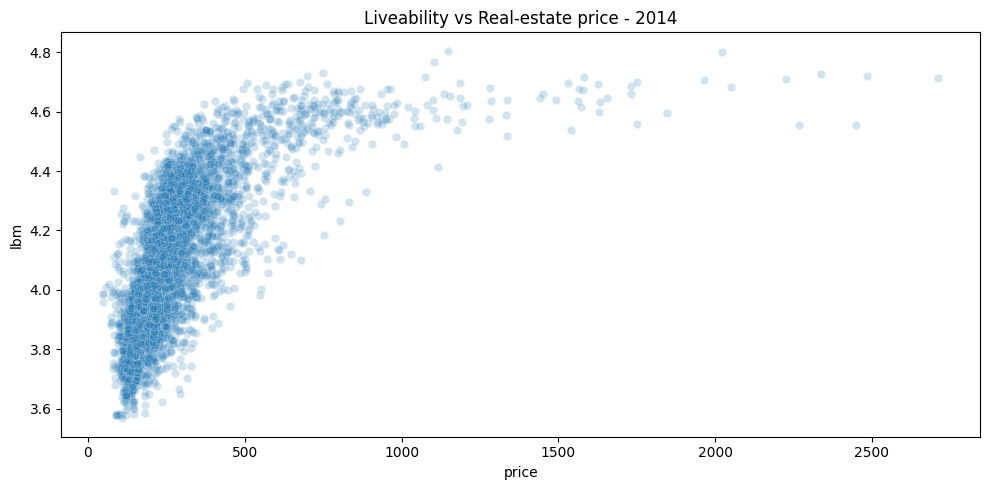

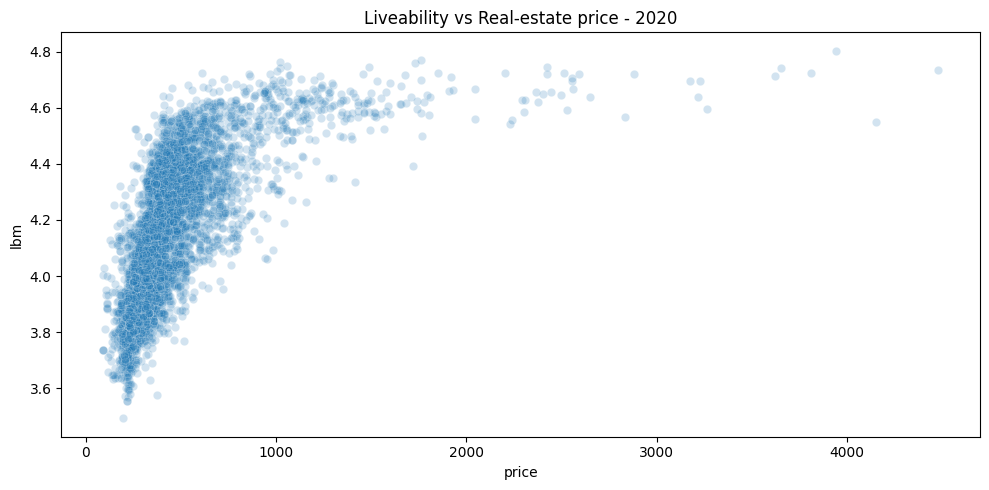

In [26]:
# explore linear associations using scatter plots between real-estate price and liveability
# 2014
fig, axes = plt.subplots(figsize=(10, 5))
fig.set_tight_layout(True)
sns.scatterplot(ax = axes,x = df_2014['price'], y = df_2014['lbm'], alpha = 0.2)
plt.title("Liveability vs Real-estate price - 2014")
# 2020
fig, axes = plt.subplots(figsize=(10, 5))
fig.set_tight_layout(True)
sns.scatterplot(ax = axes,x = df_2020['price'], y = df_2020['lbm'], alpha = 0.2)
plt.title("Liveability vs Real-estate price - 2020")

In [27]:
# calculate relative changes
relative_change_lbm = ((df_2020['lbm'] - df_2014['lbm']) / df_2014['lbm']) * 100
relative_change_price = ((df_2020['price'] - df_2014['price']) / df_2014['price']) * 100

Text(0, 0.5, 'Relative Change in Liveability (%)')

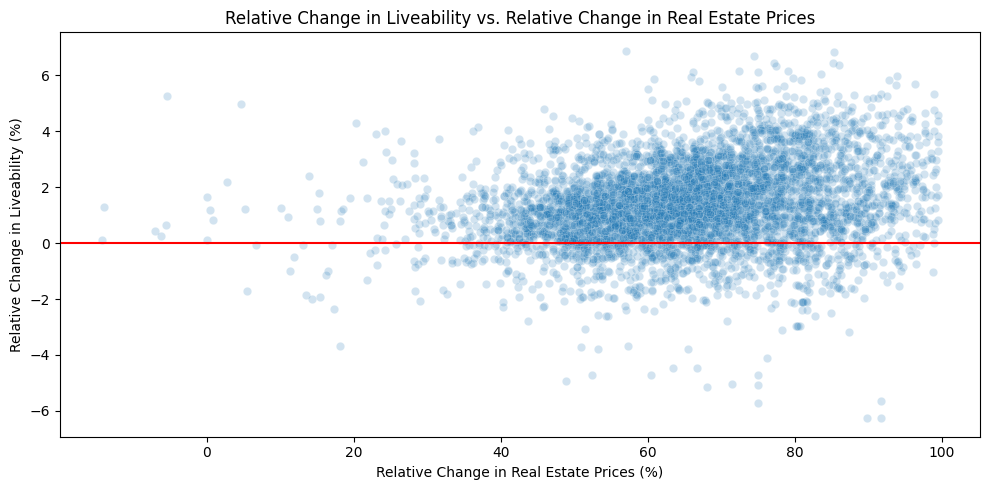

In [28]:
# plot relative change
fig, axes = plt.subplots(figsize=(10, 5))
fig.set_tight_layout(True)
sns.scatterplot(ax = axes,x = relative_change_price, y = relative_change_lbm, alpha = 0.2)
plt.axhline(y=0.0, color='r', linestyle='-')
plt.title("Relative Change in Liveability vs. Relative Change in Real Estate Prices")
plt.xlabel('Relative Change in Real Estate Prices (%)')
plt.ylabel('Relative Change in Liveability (%)')

#### Intepreation of the results

- We can see that the grids where the real-estate prices are high tend to have a better liveability score. There seems to be corelation between the two variables. So the more expensive a the property price is in a grid, the better the liveability score it has. This is true for both years 2014 and 2020.
- In grids where the prices have increased over the years by 40% or less, there hasn't been a major relative change in the liveability scores.
-  In the grids where the prices have increased over the years by 40% or above tend to improve the liveability score by a minor percentage.
- In the grids where the prices have increased above 60% or more tehnd to improve the liveability score from 0-6%.
- In each case, there are grids that have a decrease in the relative liveability score as the price increases, but there aren't many of them compared to the grids that have an improvement in the liveability score.



### 2.2 Investigate the spatial distribution of the change in real-estate price and liveability, using two maps of Amsterdam.
- Hint: for the maps, we suggest to set the boundaries for the colorscale to the 5th and the 95th percentiles of the change in price and liveability. You can use the map with the boundaries of Amsterdam as a background (`Amsterdam_boundary.gpkg`), which is located at [path](data/spatial_data/Amsterdam_boundary.gpkg).

In [29]:
print(amsterdam_bound_data.keys())
amsterdam_bound_data.info()

Index(['GM_NAAM', 'geometry'], dtype='object')
<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   GM_NAAM   1 non-null      object  
 1   geometry  1 non-null      geometry
dtypes: geometry(1), object(1)
memory usage: 144.0+ bytes


In [30]:
print(squares_ams_data.keys())
squares_ams_data.info()

Index(['grid_id', 'geometry'], dtype='object')
<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 6762 entries, 0 to 6761
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   grid_id   6762 non-null   object  
 1   geometry  6762 non-null   geometry
dtypes: geometry(1), object(1)
memory usage: 105.8+ KB


In [31]:
df_relative_change = gpd.GeoDataFrame({'grid_id': df_2020['grid_id'],
                                       'geometry': df_2020['geometry'],
                                       'relative_change_lbm': relative_change_lbm,
                                       'relative_change_price': relative_change_price
                                       }
                                      )
df_relative_change.head()

,grid_id,geometry,relative_change_lbm,relative_change_price
0,E1123N4882,"MULTIPOLYGON (((112300.000 488300.000, 112400....",-1.355712,50.645161
1,E1124N4881,"MULTIPOLYGON (((112400.000 488200.000, 112500....",-1.638647,44.186047
2,E1125N4880,"MULTIPOLYGON (((112500.000 488100.000, 112600....",-1.924262,42.541436
3,E1125N4881,"MULTIPOLYGON (((112500.000 488200.000, 112600....",-1.924262,45.288754
4,E1126N4879,"MULTIPOLYGON (((112600.000 488000.000, 112700....",-2.088794,28.988764


Text(0.5, 1.0, 'Spatial distribution of the change in real-estate price')

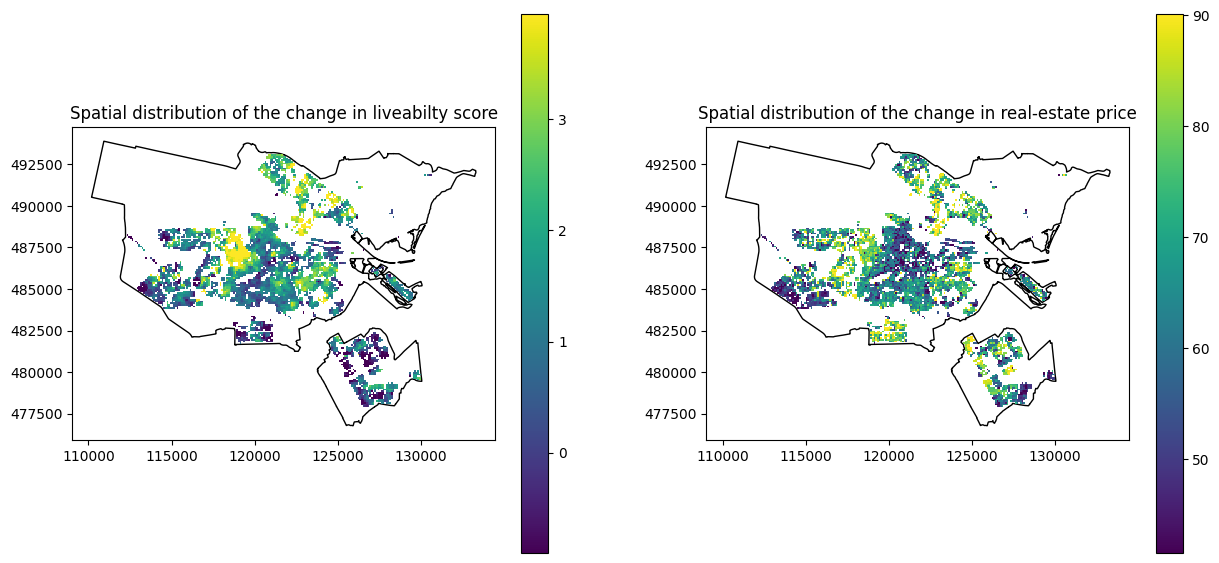

In [32]:
fig, ax = plt.subplots(1, 2, figsize=(15,7))

# background amsterdam plot
amsterdam_bound_data.plot(ax=ax[0], color  = 'none', edgecolor='black')
amsterdam_bound_data.plot(ax=ax[1], color  = 'none', edgecolor='black')

# Calculate the 5th and 95th percentiles
percentile_5 = df_relative_change['relative_change_lbm'].quantile(0.05)
percentile_95 = df_relative_change['relative_change_lbm'].quantile(0.95)
percentile_5_p = df_relative_change['relative_change_price'].quantile(0.05)
percentile_95_p = df_relative_change['relative_change_price'].quantile(0.95)

# plot relative change lbm
df_relative_change.plot(ax=ax[0], column = 'relative_change_lbm', legend = True, vmin=percentile_5, vmax=percentile_95)
ax[0].set_title("Spatial distribution of the change in liveabilty score")


# plot relative change price
df_relative_change.plot(ax=ax[1], column = 'relative_change_price', legend = True, vmin=percentile_5_p, vmax=percentile_95_p)
ax[1].set_title("Spatial distribution of the change in real-estate price")

### 2.3 What are the spatial trends for the evolution of the real-estate price and the liveability index? Do you observe some relationship between the two variables?

#### Intepreation of the results

- Grids that have had a high relative increase in real-estate price also seem to have high increase in the liveability score (West Amsterdam - yellowish area).

- Real-estate price
  - West Amsterdam has seen an above average relative increase in liveability.
  - Amsterdam Zuid amd Amsterdam Nieuwe-West has seen a relatively high increase in price.
  - Low price increase in old center.

- Liveability
  - High increase in liveability in the North and Center West.
  - Some areas have a missing liveability score.

There is a (weak) correlation between real-estate price and liveabilty score.

### 3. Predict changes in real-estate prices and liveability [2 pnt]

The municipality has more leverage to regulate real-estate prices if it can anticipate where and how prices may rise. You are thus asked to determine where the municipality should deploy measures in order to prevent liveable neighborhoods to become unaffordable.

### 3.1 Train a regression model to predict the change in real-estate price and liveability in Amsterdam between 2014 and 2020, using data for 2014

Train a regression model to predict the change in real-estate price and liveability in Amsterdam between 2014 and 2020, using data on real-estate price, liveability, demographics, housing stock, and accessibility to amenities in 2014.

- hint: Remember to handle missing data (value=-99997 in this data set).
- Print the R2 for the train and the test set

In [33]:
def prepare_training_data(df):
  # prepare training data
  training_data = df
  print(training_data.shape)

  # skip categorical vars
  skip_cols = ['grid_id', 'geometry']

  # replace empty values with nan
  training_data.replace(EMPTY_VALUE, np.nan, inplace=True)


  # "However, note that NaN appear when there are little observations to preserve privacy,
  # so the mean may not be a good replacement for missing values (replacing by 0 could suffice in this context)." - Course Staff
  # Iterate over each column and replace nan with the 0
  for column in training_data.columns:
      # skip categorical cols
      if column in skip_cols:
        continue
      training_data[column] = training_data[column].replace(np.nan, 0)

  # remove categorical varaibles
  training_data = training_data.drop(skip_cols, axis=1)

  # check if any null vals
  print("null values in each col:", training_data.isnull().sum().values)

  return training_data

training_data = prepare_training_data(df_2014)
training_data.head()

(5267, 83)
null values in each col: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0]


,lbm,afw,fys,onv,soc,vrz,won,INWONER_2014,VROUW_2014,INW_014_2014,INW_1524_2014,INW_2544_2014,INW_4564_2014,INW_65PL_2014,GEBOORTE_2014,P_NL_ACHTG_2014,P_WE_MIG_A_2014,P_NW_MIG_A_2014,AANTAL_HH_2014,TOTHH_EENP_2014,TOTHH_MPZK_2014,HH_EENOUD_2014,HH_TWEEOUD_2014,GEM_HH_GR_2014,WONING_2014,WONVOOR45_2014,WON_4564_2014,WON_6574_2014,WON_7584_2014,WON_8594_2014,WON_9504_2014,WON_0514_2014,WON_1524_2014,P_HUURWON_2014,P_KOOPWON_2014,WON_HCORP_2014,WON_MRGEZ_2014,WON_NBEW_2014,G_GAS_WON_2014,G_ELEK_WON_2014,UITKMINAOW_2014,AFS_SUPERM_2014,AV1_SUPERM_2014,AFS_DAGLMD_2014,AV1_DAGLMD_2014,AFS_WARENH_2014,AFS_CAFE_2014,AV1_CAFE_2014,AFS_CAFTAR_2014,AV1_CAFTAR_2014,AFS_HOTEL_2014,AFS_RESTAU_2014,AV1_RESTAU_2014,AFS_BSO_2014,AV1_BSO_2014,AFS_KDV_2014,AV1_KDV_2014,AFS_OPRIT_2014,AFS_TRNOVS_2014,AFS_TREINS_2014,AFS_ATTRAC_2014,AFS_BIOS_2014,AFS_MUS_2014,AFS_PODIUM_2014,AFS_BIBLIO_2014,AF_IJSBAAN_2014,AFS_SAUNA_2014,AFS_ZONBNK_2014,AFS_ZWEMB_2014,AFS_ONDBAS_2014,AV1_ONDBAS_2014,AFS_ONDHV_2014,AFS_ONDVMB_2014,AFS_ONDVRT_2014,AFS_HAPRAK_2014,AV1_HAPRAK_2014,AFS_ZIEK_E_2014,AFS_ZIEK_I_2014,AFS_APOTH_2014,AFS_HAPOST_2014,price
0,4.224886,0.122621,-0.007954,0.002207,0.078486,0.009748,0.040134,30.0,20.0,0.0,0.0,0.0,15.0,10.0,0.0,60.0,0.0,30.0,15.0,0.0,5.0,0.0,0.0,2.2,15.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,50.0,50.0,5.0,0.0,0.0,1910.0,3270.0,5.0,0.9,1.0,0.9,1.8,4.7,0.9,1.0,0.7,3.0,0.6,0.9,3.5,0.8,1.0,0.9,1.0,0.5,6.1,1.4,11.7,8.3,5.3,4.7,1.4,11.2,3.9,3.6,4.5,0.6,3.0,5.0,4.3,4.3,0.5,1.0,6.3,6.3,1.5,6.3,310.0
1,4.236831,0.134566,-0.014259,0.012684,0.097041,0.002809,0.036292,25.0,10.0,0.0,0.0,0.0,15.0,0.0,0.0,100.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,2.6,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2320.0,4850.0,0.0,1.1,0.0,1.0,0.2,4.6,1.0,0.2,0.8,1.7,0.7,1.1,0.0,0.9,1.0,1.0,0.8,0.6,6.2,1.5,11.8,8.4,5.2,4.6,1.6,11.3,3.8,3.5,4.5,0.7,3.0,4.9,4.2,4.2,0.6,1.0,6.3,6.3,1.6,6.3,387.0
2,4.248156,0.145891,-0.019517,0.023156,0.116893,-0.004729,0.030087,20.0,10.0,0.0,0.0,0.0,10.0,0.0,0.0,70.0,0.0,30.0,5.0,0.0,0.0,0.0,0.0,3.2,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2670.0,5460.0,0.0,1.2,0.0,1.2,0.0,4.5,1.2,0.0,0.9,1.0,0.9,1.2,0.0,1.0,0.2,1.1,0.0,0.7,6.4,1.6,11.6,8.6,5.1,4.4,1.7,11.5,3.6,3.4,4.4,0.9,1.2,4.7,4.0,4.0,0.8,1.0,6.2,6.2,1.8,6.2,543.0
3,4.248156,0.145891,-0.019517,0.023156,0.116893,-0.004729,0.030087,20.0,10.0,0.0,0.0,0.0,5.0,0.0,0.0,70.0,30.0,0.0,5.0,0.0,0.0,0.0,0.0,2.6,10.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1640.0,3830.0,0.0,1.1,0.0,1.1,0.0,4.5,1.1,0.0,0.9,1.0,0.8,1.1,0.0,1.0,1.0,1.1,0.0,0.7,6.3,1.6,11.7,8.5,5.1,4.5,1.6,11.4,3.7,3.4,4.4,0.8,2.8,4.8,4.1,4.1,0.7,1.0,6.3,6.3,1.7,6.3,329.0
4,4.266799,0.164535,-0.039108,0.032206,0.115276,-0.002584,0.058745,15.0,10.0,0.0,0.0,0.0,5.0,5.0,0.0,90.0,0.0,0.0,5.0,0.0,5.0,0.0,0.0,2.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2280.0,3720.0,0.0,1.4,0.0,1.3,0.0,4.3,1.3,0.0,1.1,0.0,1.0,1.4,0.0,1.2,0.0,1.3,0.0,0.9,6.5,1.8,11.5,8.5,4.9,4.3,1.9,11.6,3.5,3.2,4.2,1.0,0.1,4.6,3.9,3.9,0.9,1.0,6.0,6.0,1.9,6.0,445.0


In [34]:
def train_linear_regression_model(X, Y):
  # Set the seed number for reproducibility. It governs which data points go to the test set and which go to the training set
  random_seed = 42

  # Create linear regression object
  regr = LinearRegression(fit_intercept = True)

  # Split the data in a train and test set
  X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state = random_seed)

  # Fit the model on the training data
  regr.fit(X_train,Y_train)

  # Evaluate the model generalisation performance on the Train and Test data sets
  Y_pred_train = regr.predict(X_train)
  mse_train = mean_squared_error(Y_train,Y_pred_train)
  R2_train = r2_score(Y_train,Y_pred_train)

  Y_pred_test = regr.predict(X_test)
  mse_test  = mean_squared_error(Y_test, Y_pred_test)
  R2_test = r2_score(Y_test,Y_pred_test)

  # Print results
  print('Results linear multiple regression model')
  print(f'Mean Squared Error Train | Test: \t{mse_train:>7.4f}\t|  {mse_test:>7.4f}')
  print(f'R2                 Train | Test: \t{R2_train:>7.4f}\t|  {R2_test:>7.4f}\n')
  print('Weights')
  print(f'Intercept: \t\t\t {regr.intercept_:>7.4f}')
  for n in range(len(regr.coef_)):
      print(f'Weight_{X.keys()[n]:10s} \t\t {regr.coef_[n]:>7.4f}')

  return regr

In [35]:
# train model to predict change in lbm in future 2020
X = training_data
print(X.shape)
Y = relative_change_lbm
regr_liveability = train_linear_regression_model(X, Y)

(5267, 81)
Results linear multiple regression model
Mean Squared Error Train | Test: 	 0.9870	|   1.0121
R2                 Train | Test: 	 0.5520	|   0.5413

Weights
Intercept: 			 3209649074.0582
Weight_lbm        		 -782409032.4231
Weight_afw        		 652007522.8206
Weight_fys        		 130401501.8850
Weight_onv        		 130401506.0574
Weight_soc        		 130401508.2662
Weight_vrz        		 130401506.8740
Weight_won        		 130401499.7381
Weight_INWONER_2014 		 -0.0071
Weight_VROUW_2014 		  0.0045
Weight_INW_014_2014 		  0.0005
Weight_INW_1524_2014 		  0.0051
Weight_INW_2544_2014 		  0.0153
Weight_INW_4564_2014 		  0.0078
Weight_INW_65PL_2014 		  0.0074
Weight_GEBOORTE_2014 		 -0.0073
Weight_P_NL_ACHTG_2014 		  0.0062
Weight_P_WE_MIG_A_2014 		  0.0020
Weight_P_NW_MIG_A_2014 		 -0.0045
Weight_AANTAL_HH_2014 		 -0.0099
Weight_TOTHH_EENP_2014 		  0.0038
Weight_TOTHH_MPZK_2014 		  0.0079
Weight_HH_EENOUD_2014 		 -0.0055
Weight_HH_TWEEOUD_2014 		  0.0115
Weight_GEM_HH_GR_2014 		 -0.

In [36]:
# train model to predict change in price in future 2020
X = training_data
Y = relative_change_price
regr_price = train_linear_regression_model(X, Y)

Results linear multiple regression model
Mean Squared Error Train | Test: 	141.0109	|  149.2836
R2                 Train | Test: 	 0.3908	|   0.3662

Weights
Intercept: 			 -254875420521.4210
Weight_lbm        		 62130415725.2246
Weight_afw        		 -51775346446.3048
Weight_fys        		 -10355069263.4834
Weight_onv        		 -10355069295.3384
Weight_soc        		 -10355069300.7803
Weight_vrz        		 -10355069306.8877
Weight_won        		 -10355069279.8224
Weight_INWONER_2014 		 -0.0071
Weight_VROUW_2014 		 -0.0494
Weight_INW_014_2014 		  0.1234
Weight_INW_1524_2014 		  0.0304
Weight_INW_2544_2014 		  0.0345
Weight_INW_4564_2014 		 -0.0973
Weight_INW_65PL_2014 		 -0.0064
Weight_GEBOORTE_2014 		 -0.2858
Weight_P_NL_ACHTG_2014 		 -0.0385
Weight_P_WE_MIG_A_2014 		  0.0054
Weight_P_NW_MIG_A_2014 		 -0.0616
Weight_AANTAL_HH_2014 		  0.1037
Weight_TOTHH_EENP_2014 		 -0.1229
Weight_TOTHH_MPZK_2014 		  0.0562
Weight_HH_EENOUD_2014 		  0.0677
Weight_HH_TWEEOUD_2014 		 -0.0262
Weight_GEM_HH_G

#### 3.2 Interpretation
3.2.1 Interpret the relationship between the price in 2014 and the delta in price<br>



Text(0, 0.5, 'Delta in price (%)')

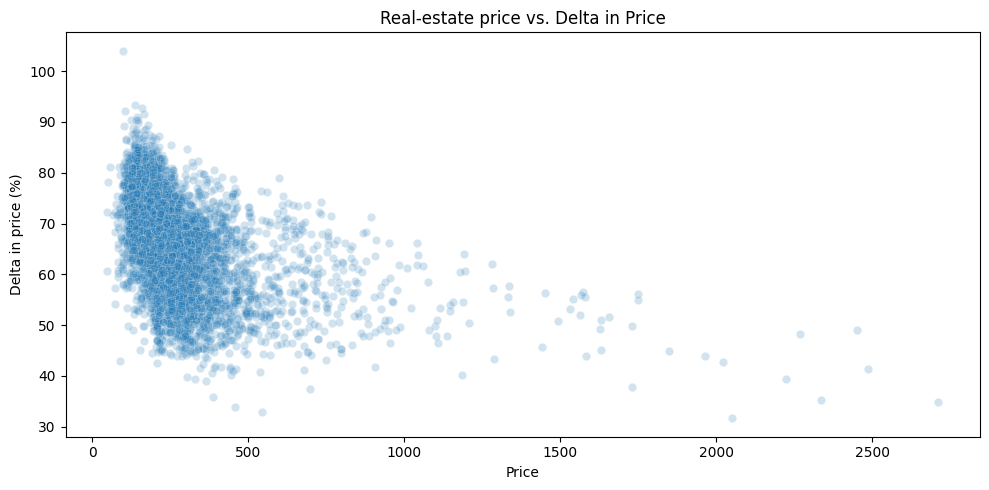

In [37]:
price_2014 = training_data.price
delta_price = regr_price.predict(X)

fig, axes = plt.subplots(figsize=(10, 5))
fig.set_tight_layout(True)
sns.scatterplot(ax = axes,x = price_2014, y = delta_price, alpha = 0.2)
plt.title("Real-estate price vs. Delta in Price")
plt.xlabel('Price')
plt.ylabel('Delta in price (%)')

- It seems like the grids with lower real-estate prices have had the highest delta in price (%) (The real-estate prices in cheaper neighborhoods increased more than in already expensive neighborhoods (in percentage terms)
- There seems to be a weak negative correlation between real-estate price and delta-in price

3.2.2 Interpret the relationship between the price in 2014 and the delta in liveability<br>

Text(0, 0.5, 'Delta in liveability (%)')

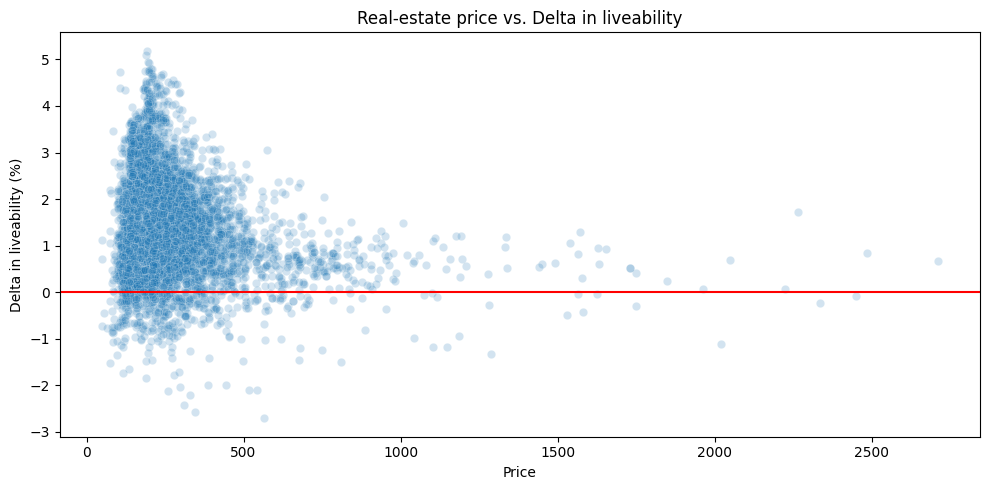

In [38]:
price_2014 = training_data.price
delta_liveability = regr_liveability.predict(X)

fig, axes = plt.subplots(figsize=(10, 5))
fig.set_tight_layout(True)
sns.scatterplot(ax = axes,x = price_2014, y = delta_liveability, alpha = 0.2)
plt.axhline(y=0.0, color='r', linestyle='-')
plt.title("Real-estate price vs. Delta in liveability")
plt.xlabel('Price')
plt.ylabel('Delta in liveability (%)')

- The grids that had lower real-estate prices saw the highest change in liveabilty score.
- As the price increases, there is a low change in liveability.


3.2.3 Compare the model performance of the two regression models. Which metric ($\Delta$ price or $\Delta$ liveavility) is easiest to predict given the available data in 2014?


Results
- The model performance of the liveability model performs better than the price model
- It also has a lower mean squared error
- Therefore, its easier to predict liveability than price given the available data in 2014

The real-estate prices in cheaper neighborhoods increased more than in already expensive neighborhoods (in percentage terms).

### 4. Predict the changes in real-estate price and liveability between 2020 and 2026, using the data of 2020.
#### 4.1 Apply the (trained) regression model on the data for 2020 to predict the target variables ($\Delta$ price or $\Delta$ liveavility) in 2026.

In [39]:
#prepare training data for 2020
training_data = prepare_training_data(df_2020)
X = training_data.values
print(X.shape)

(5267, 83)
null values in each col: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0]
(5267, 81)


In [40]:
# predict change in lbm in future 2026
delta_liveability_2026 = regr_liveability.predict(X)
# predict change in lbm in future 2026
delta_price_2026 = regr_price.predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


#### 4.2 Visualize the spatial distribution of the change in real-estate price and liveability between 2020 and 2026.
hint: Use the same colorscales as the previous map.

In [41]:
df_relative_change_2026 = gpd.GeoDataFrame({'grid_id': df_2020['grid_id'],
                                       'geometry': df_2020['geometry'],
                                       'relative_change_lbm': delta_liveability_2026,
                                       'relative_change_price': delta_price_2026
                                       }
                                      )
df_relative_change.head()

,grid_id,geometry,relative_change_lbm,relative_change_price
0,E1123N4882,"MULTIPOLYGON (((112300.000 488300.000, 112400....",-1.355712,50.645161
1,E1124N4881,"MULTIPOLYGON (((112400.000 488200.000, 112500....",-1.638647,44.186047
2,E1125N4880,"MULTIPOLYGON (((112500.000 488100.000, 112600....",-1.924262,42.541436
3,E1125N4881,"MULTIPOLYGON (((112500.000 488200.000, 112600....",-1.924262,45.288754
4,E1126N4879,"MULTIPOLYGON (((112600.000 488000.000, 112700....",-2.088794,28.988764


Text(0.5, 1.0, 'Change in real-estate price - 2026')

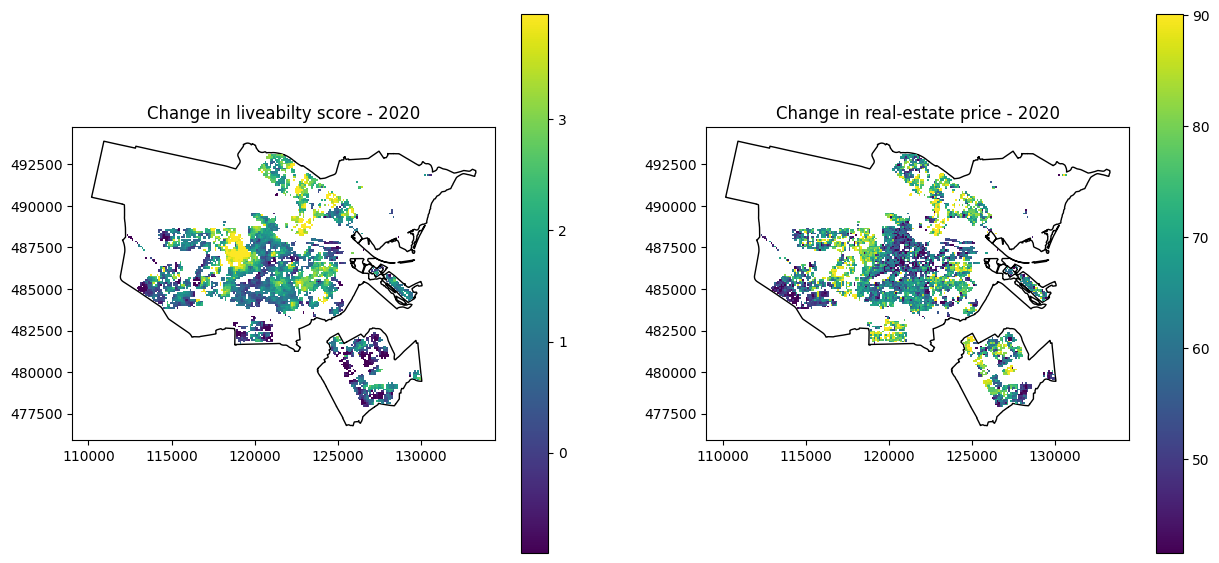

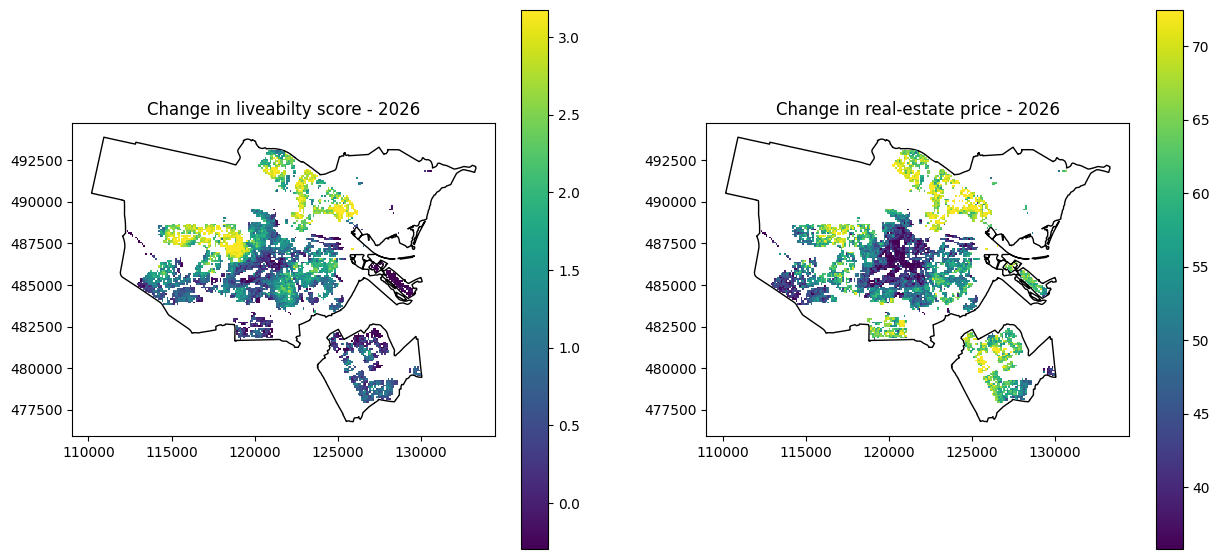

In [42]:

######################## 2020 #######################
fig, ax = plt.subplots(1, 2, figsize=(15,7))

# background amsterdam plot
amsterdam_bound_data.plot(ax=ax[0], color  = 'none', edgecolor='black')
amsterdam_bound_data.plot(ax=ax[1], color  = 'none', edgecolor='black')

# Calculate the 5th and 95th percentiles
percentile_5 = df_relative_change['relative_change_lbm'].quantile(0.05)
percentile_95 = df_relative_change['relative_change_lbm'].quantile(0.95)
percentile_5_p = df_relative_change['relative_change_price'].quantile(0.05)
percentile_95_p = df_relative_change['relative_change_price'].quantile(0.95)

# plot relative change lbm
df_relative_change.plot(ax=ax[0], column = 'relative_change_lbm', legend = True, vmin=percentile_5, vmax=percentile_95)
ax[0].set_title("Change in liveabilty score - 2020")


# plot relative change price
df_relative_change.plot(ax=ax[1], column = 'relative_change_price', legend = True, vmin=percentile_5_p, vmax=percentile_95_p)
ax[1].set_title("Change in real-estate price - 2020")


######################## 2026 ########################
fig, ax = plt.subplots(1, 2, figsize=(15,7))

# background amsterdam plot
amsterdam_bound_data.plot(ax=ax[0], color  = 'none', edgecolor='black')
amsterdam_bound_data.plot(ax=ax[1], color  = 'none', edgecolor='black')

# Calculate the 5th and 95th percentiles
percentile_5 = df_relative_change_2026['relative_change_lbm'].quantile(0.05)
percentile_95 = df_relative_change_2026['relative_change_lbm'].quantile(0.95)
percentile_5_p = df_relative_change_2026['relative_change_price'].quantile(0.05)
percentile_95_p = df_relative_change_2026['relative_change_price'].quantile(0.95)

# plot relative change lbm
df_relative_change_2026.plot(ax=ax[0], column = 'relative_change_lbm', legend = True, vmin=percentile_5, vmax=percentile_95)
ax[0].set_title("Change in liveabilty score - 2026")

# plot relative change price
df_relative_change_2026.plot(ax=ax[1], column = 'relative_change_price', legend = True, vmin=percentile_5_p, vmax=percentile_95_p)
ax[1].set_title("Change in real-estate price - 2026")

#### 4.3 What is the difference between the predicted evolution between 2020 and 2026 and the observed evolution between 2014 and 2020?

- Real-estate price:
    - Overall, predicted relative increase is lower compared to the increase between 2014 and 2020.
    - Increase in the West and in the North of Amsterdam.
- Liveability:
    - Increase in the West and in the North of Amsterdam.

#### 4.4 Qualitative reflection on machine learning and generalisation
The assignment involved using a regression model trained on data from 2014 to 2020 to predict the changes in real estate prices and liveability scores between 2020 and 2026. What assumption(s) underlies this approach? Explain a situation in which this assumption could fail.


Assumptions:
- The underlying approach makes an assumtion that the relationship between the predictor variables and target varaibales won't change significantly over time.
- The model assumes that there will be similar economic and environmental conditions.
- The model makes the assumption that the statistical properties of the data, such as mean and variance, remain constant over time. This assumption is particularly important in time series analysis.


A situation(s) where this assumption could fail:
- The model will fail if there is an economic crisis or other significant events betwen 2020 and 2026.
- The model will fail if there are any policy changes related to real-estate, urban development or other factors that impact the relationship between the predictors and outcomes.
- The model will fail if there are any environmental changes such as natural disasters or climate change impacts.